In [1]:
import pandas as pd
import numpy as np


In [2]:
# Load the dataset
df=pd.read_csv('/content/titanic.csv')

In [3]:
# Display first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
# Display last 5 rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q


In [54]:
# Identify numerical vs. categorical features
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [55]:
# Check number of rows and columns
df.shape

(891, 12)

In [56]:
# Display number of missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [51]:
# Handle Missing Values
# df = df.drop('Cabin', axis=1)
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age'] =df['Age'].fillna(df['Age'].mean())


In [57]:
# Check missing values after handling
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [58]:
# Display descriptive statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
# Frequency Counts for Numerical Features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
df[numerical_features].value_counts()

,,,,,,,count
PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,
891,0,3,32.0,0,0,7.7500,1
1,0,3,22.0,1,0,7.2500,1
2,1,1,38.0,1,0,71.2833,1
3,1,3,26.0,0,0,7.9250,1
4,1,1,35.0,1,0,53.1000,1
...,...,...,...,...,...,...,...
16,1,2,55.0,0,0,16.0000,1
15,0,3,14.0,0,0,7.8542,1
14,0,3,39.0,1,5,31.2750,1


In [60]:
# Frequency Counts for Categorical Features
categorical_features = df.select_dtypes(include='object').columns.tolist()
df[categorical_features].value_counts()

,,,,,count
Name,Sex,Ticket,Cabin,Embarked,
"Allen, Miss. Elisabeth Walton",female,24160,B5,S,1
"Allison, Master. Hudson Trevor",male,113781,C22 C26,S,1
"Allison, Miss. Helen Loraine",female,113781,C22 C26,S,1
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S,1
"Anderson, Mr. Harry",male,19952,E12,S,1
...,...,...,...,...,...
"Wick, Miss. Mary Natalie",female,36928,C7,S,1
"Widener, Mr. Harry Elkins",male,113503,C82,C,1
"Williams-Lambert, Mr. Fletcher Fellows",male,113510,C128,S,1


In [6]:
#import libraries for data visualizations

import matplotlib.pyplot as plt
import seaborn as sns

## distribution  Numerical  data

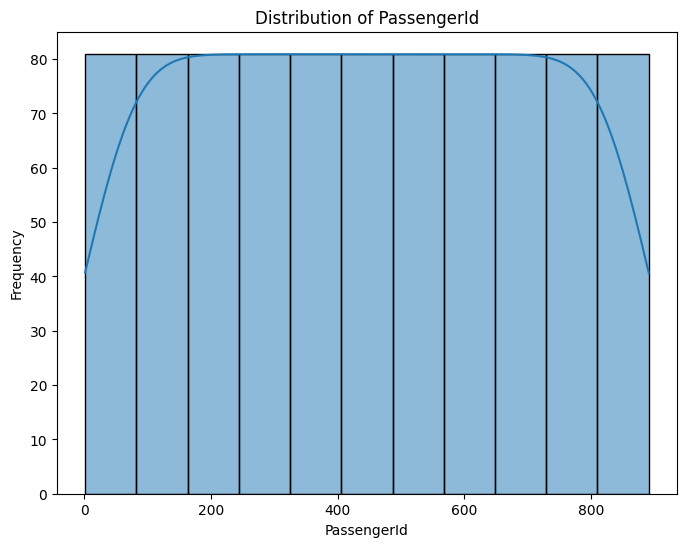

In [62]:
# Distribution of PassengerId
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='PassengerId', kde=True)
plt.title('Distribution of PassengerId')
plt.xlabel('PassengerId')
plt.ylabel('Frequency')
plt.show()

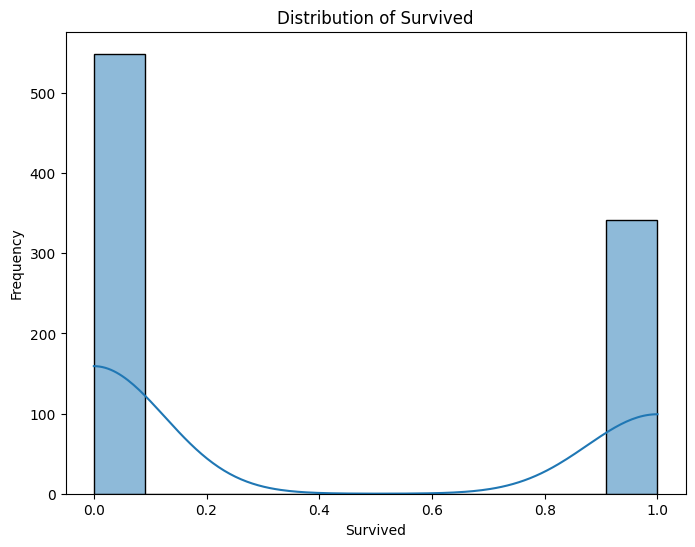

In [63]:
# Distribution of Survived
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Survived', kde=True)
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

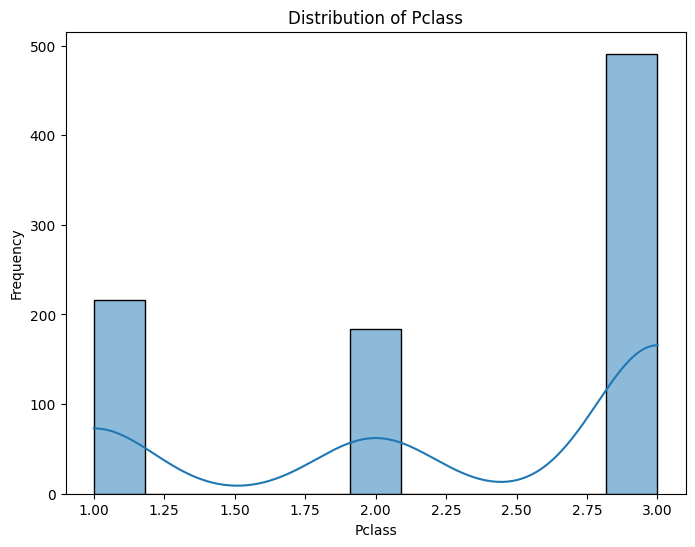

In [64]:
# Distribution of Pclass
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Pclass', kde=True)
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.show()

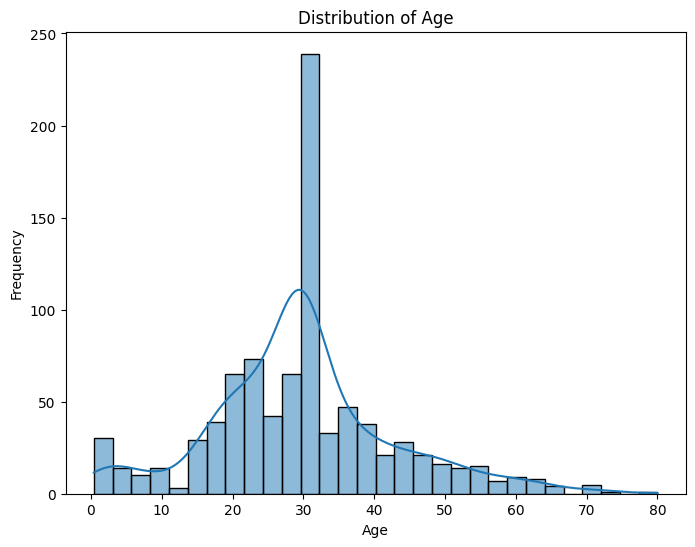

In [65]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

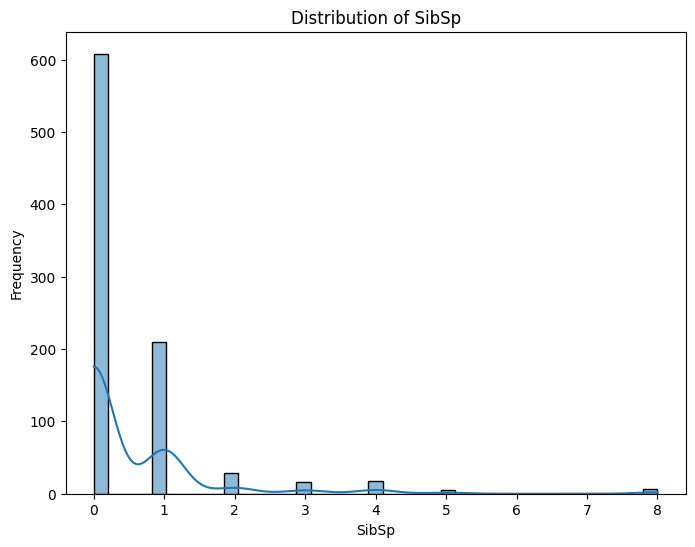

In [66]:
# Distribution of SibSp
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='SibSp', kde=True)
plt.title('Distribution of SibSp')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.show()

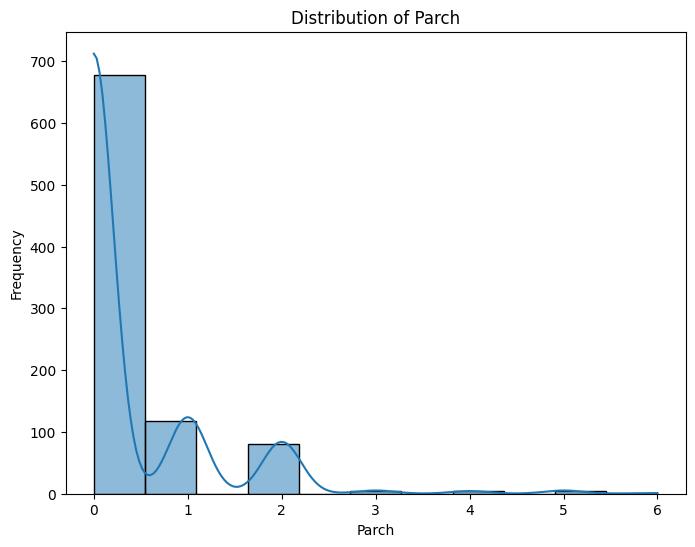

In [67]:
# Distribution of Parch
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Parch', kde=True)
plt.title('Distribution of Parch')
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.show()

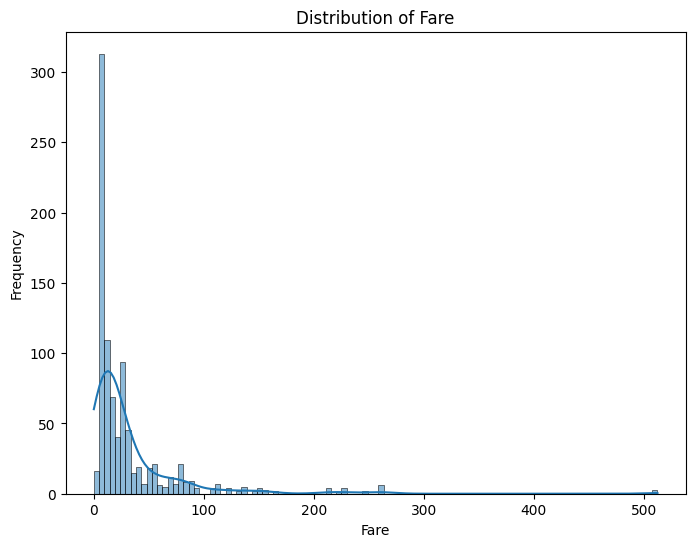

In [68]:
# Distribution of Fare
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Fare', kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [70]:
## distribution  categorical data

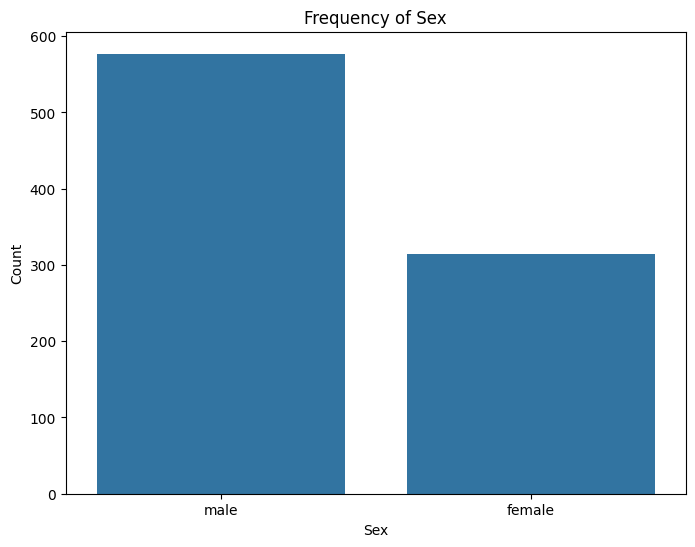

In [69]:
# Frequency of Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex')
plt.title('Frequency of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [50]:
# Display variables in the kernel

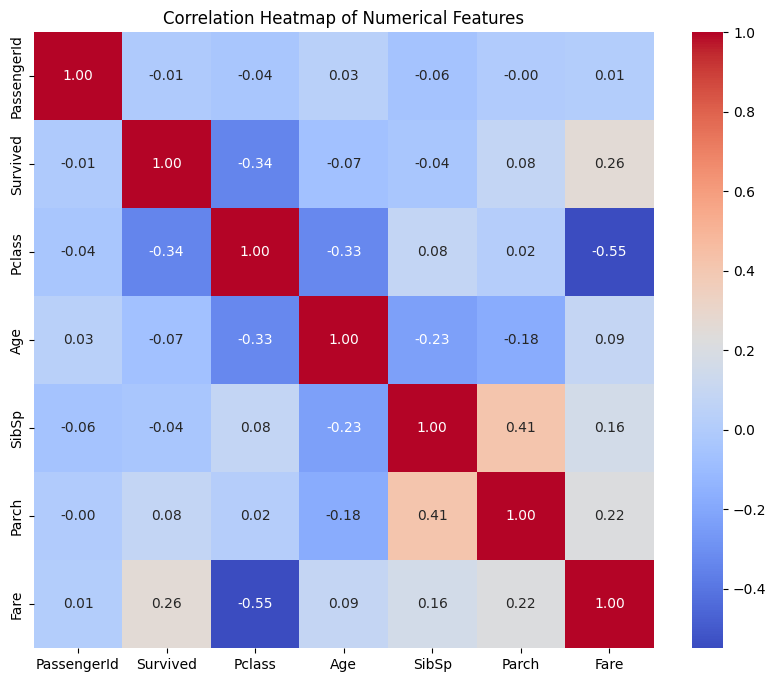

In [71]:
# Draw heatmaps to show correlation between numerical variables

# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

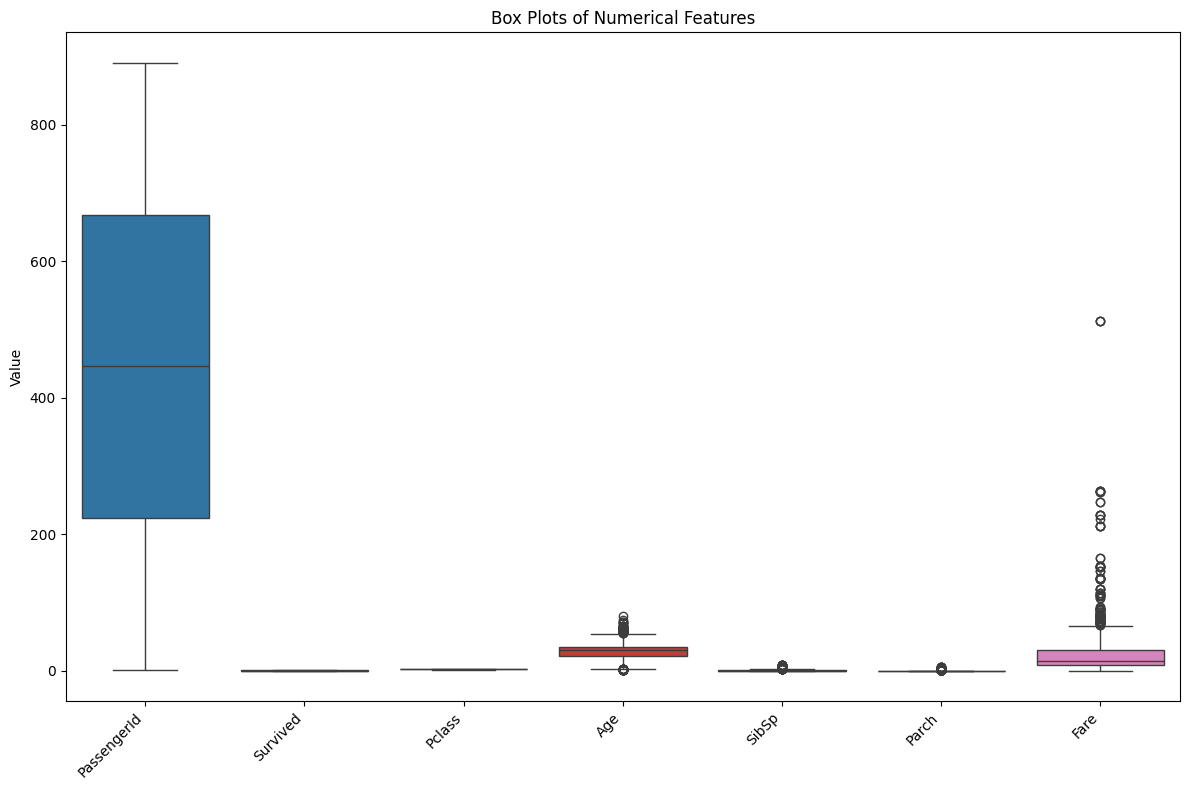

In [74]:
# Visualize Numerical Feature Distributions with Box Plots
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_features])
plt.title('Box Plots of Numerical Features')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

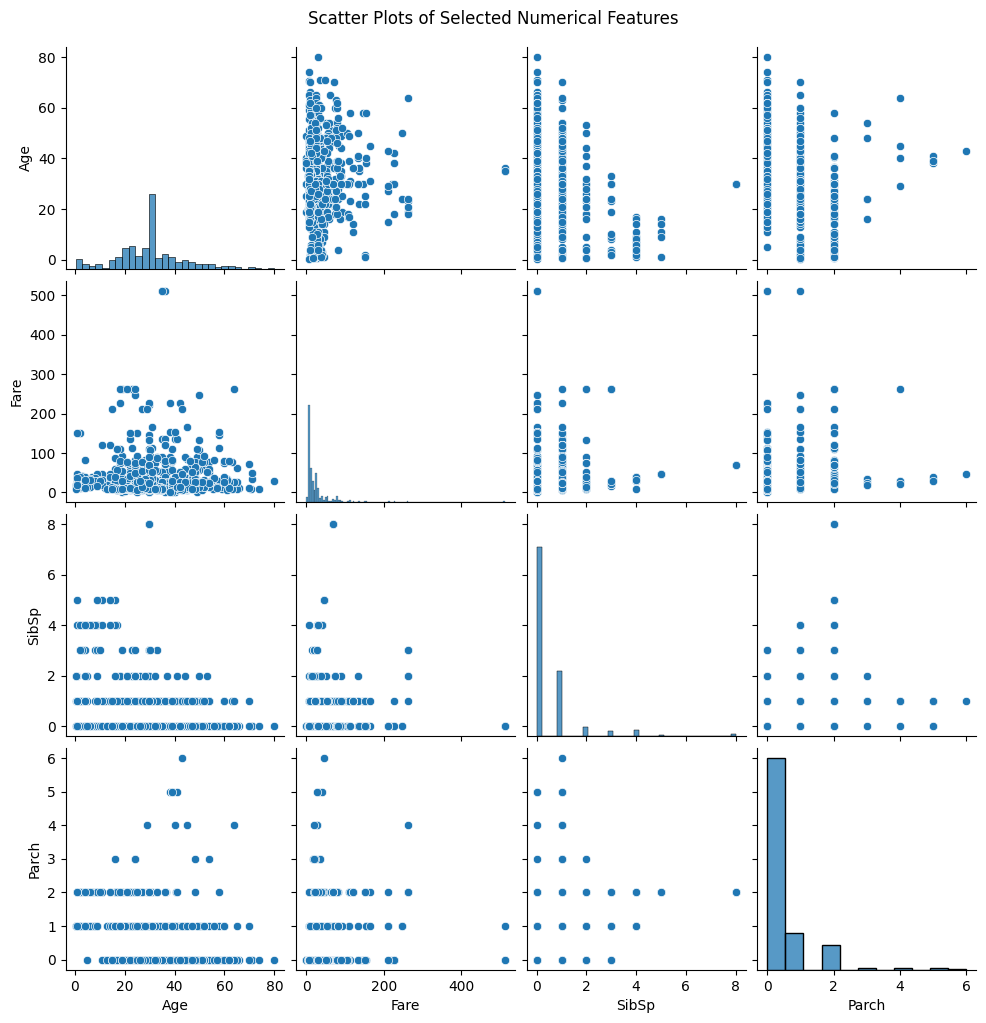

In [75]:
# Visualize Relationships with Scatter Plots
# Select numerical features excluding 'PassengerId' as it is just an identifier
numerical_features_for_scatter = df.select_dtypes(include=np.number).columns.tolist()
if 'PassengerId' in numerical_features_for_scatter:
    numerical_features_for_scatter.remove('PassengerId')

# Create scatter plots for pairs of numerical features
# We will use a subset of features to avoid generating too many plots
features_to_plot = ['Age', 'Fare', 'SibSp', 'Parch']

sns.pairplot(df[features_to_plot])
plt.suptitle('Scatter Plots of Selected Numerical Features', y=1.02)
plt.show()

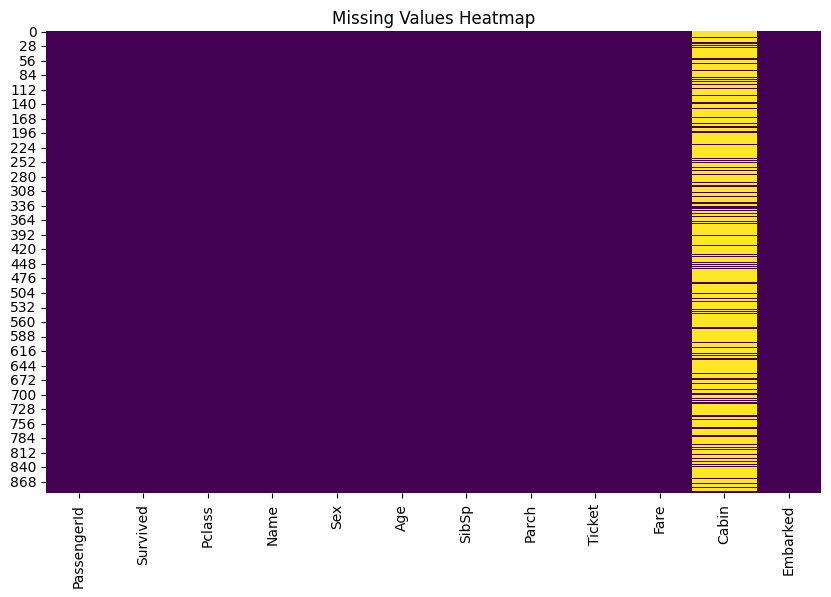

In [76]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
# Choose and apply a missing value strategy

# Fill missing values in 'Age' with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing values in 'Embarked' with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Check missing values after handling
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
# Verify missing values are handled

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
%%markdown
### Missing Value Handling Strategy

Based on the analysis of missing values, specifically the heatmap visualization, the 'Cabin' column was identified as having a very high percentage of missing data. With 687 out of 891 values missing (approximately 77%), imputation or other methods to fill these missing values would likely introduce significant noise or bias into the dataset.

Therefore, the chosen strategy for handling missing values in the 'Cabin' column was to drop the entire column. This approach is justified because the large proportion of missing data makes it difficult to derive meaningful insights or accurately impute values for this feature. Dropping the column ensures that the remaining analysis and modeling are not negatively impacted by a feature with such extensive missingness.

For other columns with missing values, 'Age' was imputed with the mean and 'Embarked' was imputed with the mode, as the number of missing values was relatively small, making imputation a reasonable approach.

### Missing Value Handling Strategy

Based on the analysis of missing values, specifically the heatmap visualization, the 'Cabin' column was identified as having a very high percentage of missing data. With 687 out of 891 values missing (approximately 77%), imputation or other methods to fill these missing values would likely introduce significant noise or bias into the dataset.

Therefore, the chosen strategy for handling missing values in the 'Cabin' column was to drop the entire column. This approach is justified because the large proportion of missing data makes it difficult to derive meaningful insights or accurately impute values for this feature. Dropping the column ensures that the remaining analysis and modeling are not negatively impacted by a feature with such extensive missingness.

For other columns with missing values, 'Age' was imputed with the mean and 'Embarked' was imputed with the mode, as the number of missing values was relatively small, making imputation a reasonable approach.


## Summary:

### Data Analysis Key Findings

*   A heatmap visualization revealed a significant number of missing values in the 'Cabin' column.
*   The 'Cabin' column was dropped due to a large proportion of missing data (approximately 77%).
*   After dropping the 'Cabin' column and applying imputation strategies (not explicitly detailed in the steps for 'Age' and 'Embarked'), the dataset has no remaining missing values.

### Insights or Next Steps

*   The decision to drop the 'Cabin' column is a reasonable approach when dealing with a high percentage of missing data to avoid introducing bias through imputation.
*   Proceed with further data analysis or modeling using the dataset with handled missing values.
